In [ ]:
%pip install matplotlib
%pip install pandas
%pip install openpyxl
%pip install ir_datasets

In [160]:
import pandas as pd
import json
import ir_datasets
import functions.evaluetion_functions as ev
import matplotlib.pyplot as plt

# CARREGA DADOS

In [161]:
f = open('nir_ndcg.json')
nir_ndcg = json.load(f)

f = open('els_ndcg.json')
els_ndcg = json.load(f)

metrics = ev.merge(nir_ndcg, els_ndcg)

f = open('nir_recall_precision.json')
nir_f_score = json.load(f)

f = open('els_recall_precision.json')
els_f_score = json.load(f)

# df = pd.DataFrame(nir_f_score)
# with open('recallnir.tex', 'w') as tf:
#     tf.write(df[["recall", "precision", "f_scores"]]
#              .rename(columns={
#                  "recall": "Recuperação", 
#                  "precision": "Precisão", 
#                  "f_scores":"F score"
#                 })
#              .to_latex(
#                 index=True,
#                 caption="Dados de recuperação, precisão e f-score ",
#                 label="tab:fscorenir",
#                 escape=False,
#                 column_format="cccc"
#                 ))


df_els_ndcg = pd.DataFrame(els_ndcg)
df_els_f1 = pd.DataFrame(els_f_score)

df_nir_ndcg = pd.DataFrame(nir_ndcg)
df_nir_f1 = pd.DataFrame(nir_f_score)

In [162]:
df_els_ndcg.to_excel('xls/els_ndcg.xlsx')
df_nir_ndcg.to_excel('xls/nir_ndcg.xlsx')
df_els_f1.to_excel('xls/els_f1.xlsx')
df_nir_f1.to_excel('xls/nir_f1.xlsx')

# TABELA DE CONSULTAS

In [163]:
dict_qid = {}
list_qid = []
list_query = []
list_doc_rel = []
list_sys = []

for key in nir_f_score['query_ids']:
    dict_qid[nir_f_score['query_ids'][key]] = 'nir'
    list_doc_rel.append(nir_f_score['total_relevants'][key])

for key in els_f_score['query_ids']:

    local_key = els_f_score['query_ids'][key]
    
    if local_key in dict_qid:
        dict_qid[els_f_score['query_ids'][key]] = 'els / nir'
    else:
        dict_qid[els_f_score['query_ids'][key]] = 'els'
        list_doc_rel.append(els_f_score['total_relevants'][key])

myKeys = list(dict_qid.keys())
myKeys.sort()
sorted_dict = {i: dict_qid[i] for i in myKeys}

for key in sorted_dict:
    list_qid.append(key)
    list_sys.append(sorted_dict[key])

dataset = ir_datasets.load('cranfield')
for query in dataset.queries_iter():

    for key in dict_qid:
        if int(key) == int(query.query_id):
            list_query.append(query.text)

local_query_data = {
    "qid": list_qid,
    # "query": list_query,
    "docrel": list_doc_rel,
    "system": list_sys
}        

df_query_data = pd.DataFrame(local_query_data)
df_query_data.to_excel('xls/query_data.xlsx')
# df_query_data

In [164]:
list_f1_nir = []
list_f1_els = []

for qid in sorted_dict:
    append = True
    for key in nir_f_score['query_ids']:
        if str(qid) == str(nir_f_score['query_ids'][key]):
            list_f1_nir.append(nir_f_score['f_scores'][key])
            append = False
            break
    if append:
        list_f1_nir.append(0)    

for qid in sorted_dict:
    append = True
    for key in els_f_score['query_ids']:
        if str(qid) == str(els_f_score['query_ids'][key]):
            list_f1_els.append(els_f_score['f_scores'][key])
            append = False
            break
    if append:
        list_f1_els.append(0)   

# AVALIAÇÕES

## F1 Arquitetura

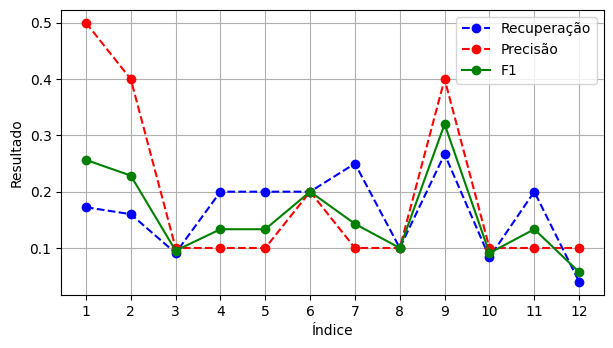

In [165]:
recall_nir = ev.dict_to_list(nir_f_score['recall'])
precision_nir = ev.dict_to_list(nir_f_score['precision'])
f1_nir = ev.dict_to_list(nir_f_score['f_scores'])

fig, ax = plt.subplots(figsize=(7, 3.7))
ax.plot(recall_nir, "o", label="Recuperação", linestyle='--',color='blue')
ax.plot(precision_nir, "o", label="Precisão", linestyle='--',color='red')
ax.plot(f1_nir, "o", label="F1", linestyle='-',color='green')

x_stick = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
x_labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

#add axis labels to plot
# ax.set_title('F1 Sore')
ax.set_xlabel('Índice')
ax.set_ylabel('Resultado')
ax.legend()
ax.grid(True)
plt.savefig("pdf/nir_f1_score.pdf", format="pdf")

## F1 Elastic

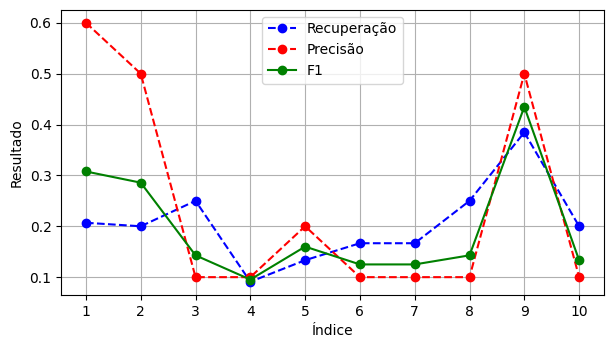

In [166]:
recall_nir = ev.dict_to_list(els_f_score['recall'])
precision_nir = ev.dict_to_list(els_f_score['precision'])
f1_nir = ev.dict_to_list(els_f_score['f_scores'])

fig, ax = plt.subplots(figsize=(7, 3.7))
ax.plot(recall_nir, "o", label="Recuperação", linestyle='--',color='blue')
ax.plot(precision_nir, "o", label="Precisão", linestyle='--',color='red')
ax.plot(f1_nir, "o", label="F1", linestyle='-',color='green')

x_stick = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x_labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

#add axis labels to plot
# ax.set_title('F1 Sore')
ax.set_xlabel('Índice')
ax.set_ylabel('Resultado')
ax.legend()
ax.grid(True)
plt.savefig("pdf/els_f1_score.pdf", format="pdf")

## F1 - ELS vs NIR Por Indice 

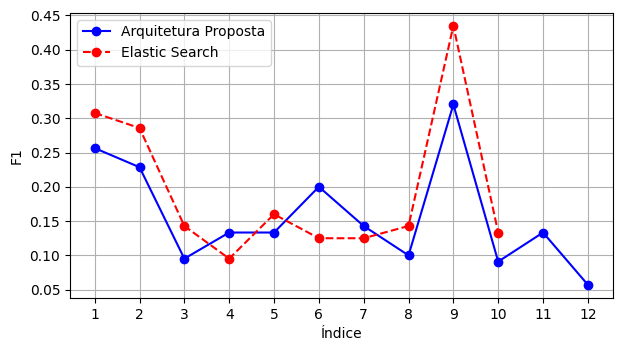

In [167]:
f1_nir = ev.dict_to_list(nir_f_score['f_scores'])
f1_els = ev.dict_to_list(els_f_score['f_scores'])

fig, ax = plt.subplots(figsize=(7, 3.7))
ax.plot(f1_nir, "o", label="Arquitetura Proposta", linestyle='-',color='blue')
ax.plot(f1_els, "o", label="Elastic Search", linestyle='--',color='red')


x_stick = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
x_labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

#add axis labels to plot
# ax.set_title('F1 Sore')
ax.set_xlabel('Índice')
ax.set_ylabel('F1')
ax.legend()
ax.grid(True)
# plt.show()
plt.savefig("pdf/f_score_index.pdf", format="pdf")

## F1 - ELS vs NIR por QID

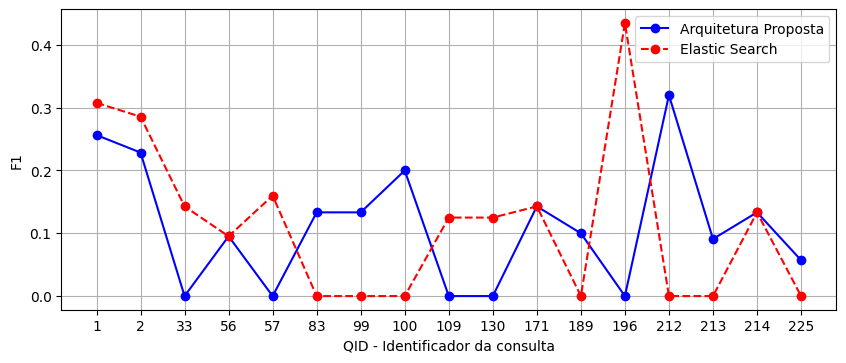

In [168]:
f1_nir = list_f1_nir
f1_els = list_f1_els

fig, ax = plt.subplots(figsize=(10, 3.9))
ax.plot(f1_nir, "o", label="Arquitetura Proposta", linestyle='-',color='blue')
ax.plot(f1_els, "o", label="Elastic Search", linestyle='--',color='red')

i = 0
x_stick = []
for qid in list_qid:
    x_stick.append(i)
    i = i + 1

x_labels = list_qid
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

#add axis labels to plot
# ax.set_title('F1 Sore')
ax.set_xlabel('QID - Identificador da consulta')
ax.set_ylabel('F1')
ax.legend()
ax.grid(True)
# plt.show()
plt.savefig("pdf/f_score_qid.pdf", format="pdf")

## IDCG, DCG, NDCG - NIR

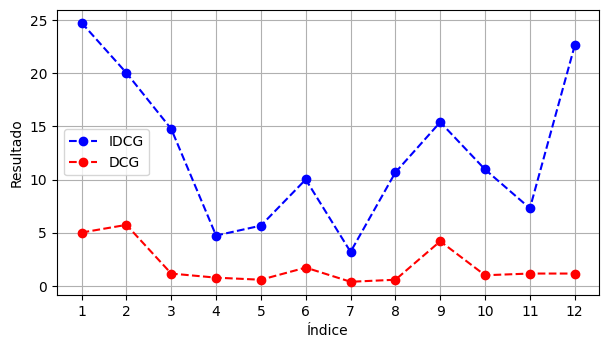

In [169]:
nir_idcg_chart = ev.dict_to_list(nir_ndcg['true_dcg_k'])
nir_dcg_chart = ev.dict_to_list(nir_ndcg['nir_dcg_k'])
# nir_ndcg = ev.dict_to_list(nir_ndcg['nir_ndcg_k'])

fig, ax = plt.subplots(figsize=(7, 3.7))
ax.plot(nir_idcg_chart, "o", label="IDCG", linestyle='--',color='blue')
ax.plot(nir_dcg_chart, "o", label="DCG", linestyle='--',color='red')
# ax.plot(nir_ndcg, "o", label="NDCG", linestyle='-',color='green')

x_stick = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
x_labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

#add axis labels to plot
# ax.set_title('F1 Sore')
ax.set_xlabel('Índice')
ax.set_ylabel('Resultado')
ax.legend()
ax.grid(True)
plt.savefig("pdf/nir_idcg.pdf", format="pdf")

## IDCG, DCG, NDCG - ELS

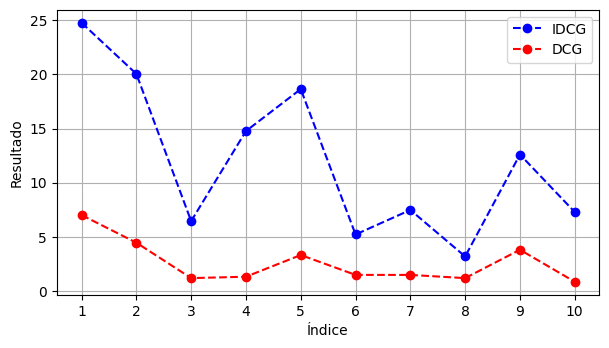

In [170]:
els_idcg_chart = ev.dict_to_list(els_ndcg['true_dcg_k'])
els_dcg_chart = ev.dict_to_list(els_ndcg['els_dcg_k'])
# nir_ndcg = ev.dict_to_list(nir_ndcg['nir_ndcg_k'])

fig, ax = plt.subplots(figsize=(7, 3.7))
ax.plot(els_idcg_chart, "o", label="IDCG", linestyle='--',color='blue')
ax.plot(els_dcg_chart, "o", label="DCG", linestyle='--',color='red')
# ax.plot(nir_ndcg, "o", label="NDCG", linestyle='-',color='green')

x_stick = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x_labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

#add axis labels to plot
# ax.set_title('F1 Sore')
ax.set_xlabel('Índice')
ax.set_ylabel('Resultado')
ax.legend()
ax.grid(True)
plt.savefig("pdf/els_idcg.pdf", format="pdf")